# python中的分群质量评估
https://blog.csdn.net/sinat_26917383/article/details/70577710  
在已知实际的label时，可以用以下指标评估算法的性能：  
* Adjusted Rand index 调整兰德指数  
ARI的取值范围[-1, 1]， 值越大表示聚类结果与真实情况越吻合
* Mutual Information based scores互信息: 也用来衡量两个数据分布的吻合程度  
ARI的取值范围[-1, 1]， 值越大表示聚类结果与真实情况越吻合

In [11]:
from sklearn.datasets import make_moons, make_blobs
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def create_data(centers, num=100, std=0.7):
    X, label_true = make_blobs(n_samples=num, cluster_std=std, centers=centers)
    return X, label_true

In [6]:
a, b = create_data([[0, 0]])

In [7]:
b == 1

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [8]:
a[b == 1, 0]

array([], dtype=float64)

In [9]:
def plot_data(*data):
    X, label_true = data
    labels = np.unique(label_true)
    colors = 'rgbyckm'
    for i, label in enumerate(labels):
        position = label_true==label
        plt.scatter(X[position, 0], X[position, 1], label=f'cluster{label}', color=colors[i])
    plt.legend(loc='best', framealpha=0.5)
    plt.show()

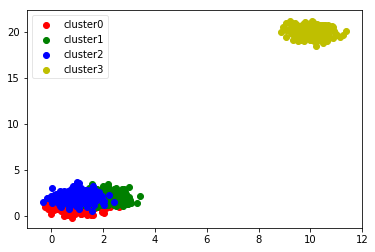

In [18]:
a, b = create_data([[1, 1], [2, 2], [1, 2], [10, 20]], 1000, 0.5)
plot_data(a, b)

# Kmeans

In [ ]:
cluster.KMeans(
    n_clusters=8,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=0.0001,
    precompute_distances='auto',
    verbose=0,
    random_state=None,
    copy_x=True,
    n_jobs=None,
    algorithm='auto',
)

## Attributes
----------
cluster_centers_ : array, [n_clusters, n_features]
    Coordinates of cluster centers. If the algorithm stops before fully
    converging (see ``tol`` and ``max_iter``), these will not be
    consistent with ``labels_``.

labels_ :
    Labels of each point

inertia_ : float
    Sum of squared distances of samples to their closest cluster center.

n_iter_ : int
    Number of iterations run.

In [31]:
from sklearn import cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

In [16]:
def test_Kmeans(*data):
    X, label_true = data
    clst = cluster.KMeans()
    clst.fit(X)
    predicted_labels = clst.predict(X)
    print(f'ARI: {adjusted_rand_score(label_true, predicted_labels)}')
    print(f'Sum center distance {clst.inertia_}')

In [19]:
test_Kmeans(a, b)

ARI: 0.3458672206277746
Sum center distance 217.73361597471597


In [34]:
def test_Kmeans_nclusters(*data):
    X, label_true = data
    ARIs = []
    Distances = []
    MutualInfoScores = []
    nums = range(2, 50)
    for num in nums:
        clst = cluster.KMeans(n_clusters=num)
        clst.fit(X)
        predicted_labels = clst.predict(X)
        ARIs.append(adjusted_rand_score(label_true, predicted_labels))
        Distances.append(clst.inertia_)
        MutualInfoScores.append(adjusted_mutual_info_score(label_true, predicted_labels))
    plt.subplot(311)
    plt.plot(nums, ARIs, marker='+')
    plt.ylabel('ARI')
    plt.subplot(312)
    plt.plot(nums, MutualInfoScores, marker='^')
    plt.ylabel('MutualInfoScores')
    plt.subplot(313)
    plt.ylabel('Distance')
    plt.plot(nums, Distances, marker='o')
    plt.show()

## evaluate

可以看到，当num=4时，ARI最小！

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To mat

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To mat

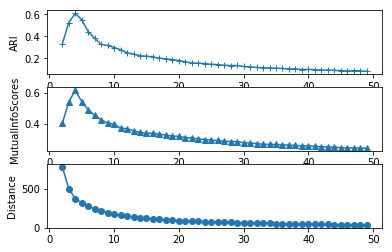

In [35]:
test_Kmeans_nclusters(a, b)